## Import

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import pathlib

## Functions

In [2]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [5]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [6]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
def view_random_image(target_dir, class_name=""):
  target_folder = target_dir + '/' + class_name
  
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_folder)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

## Download the dataset

In [2]:
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip'

zip_dir = tf.keras.utils.get_file(origin=url, extract=True)
zip_dir

'C:\\Users\\bruce\\.keras\\datasets\\101_food_classes_10_percent.zip'

```
# File structure
pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
```

In [3]:
base_dir = os.path.join(os.path.dirname(zip_dir), '101_food_classes_10_percent')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

data_dir = pathlib.Path(train_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [11]:
walk_through_dir(base_dir)

There are 2 directories and 0 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent'.
There are 101 directories and 0 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent\test'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent\test\apple_pie'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent\test\baby_back_ribs'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent\test\baklava'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent\test\beef_carpaccio'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent\test\beef_tartare'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\101_food_classes_10_percent\test\beet_salad'.
There are 0 directories and 250 images in 'C:\Users\bruce\.kera

['2813842.jpg']
Image shape: (512, 512, 3)


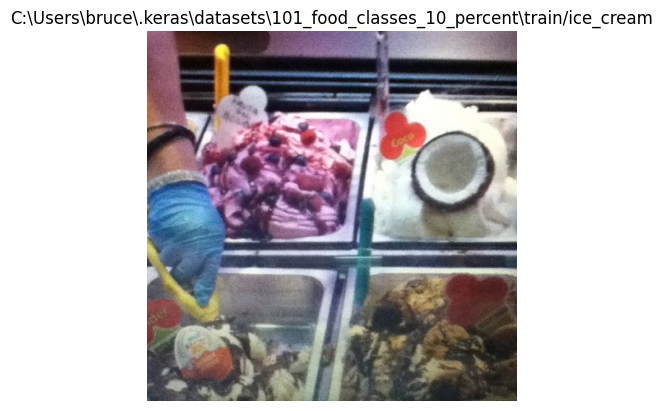

In [12]:
rand_img = view_random_image(target_dir=train_dir, class_name='ice_cream')

## Prepare BatchDataset

Instead of using `ImageDataGenerator()`, we now introduce `image_dataset_from_directory()`.

In [5]:
BATCH_SIZE = 32
IMG_SHAPE  = 224

train_batches = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SHAPE, IMG_SHAPE),
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

for images, labels in train_batches.take(1):
    print(images, labels)

Found 7575 files belonging to 101 classes.
tf.Tensor(
[[[[251.68878    254.2296     246.97449   ]
   [250.11734    251.78572    246.76021   ]
   [250.42348    252.20918    252.12755   ]
   ...
   [186.92857    157.14284    242.71431   ]
   [185.88263    157.88263    242.88263   ]
   [182.84189    156.84189    243.84189   ]]

  [[248.67346    252.74489    251.38776   ]
   [250.9949     254.93367    254.84694   ]
   [242.92857    245.78572    253.54082   ]
   ...
   [186.37242    158.34181    243.35712   ]
   [184.12753    157.99489    244.99489   ]
   [183.64293    157.64293    244.64293   ]]

  [[247.21938    251.64795    255.        ]
   [233.0306     237.2602     249.70407   ]
   [193.65305    196.86732    215.84183   ]
   ...
   [182.42851    156.59686    243.42854   ]
   [178.10199    152.64284    241.3724    ]
   [175.42354    151.36232    239.92863   ]]

  ...

  [[  4.3520484    7.3520484   24.352049  ]
   [  1.4132233    4.4132233   21.413223  ]
   [  0.2601776    2.6428137   1

In [6]:
val_batches = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SHAPE, IMG_SHAPE),
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 25250 files belonging to 101 classes.


In [10]:
class_names = train_batches.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Build models using pretrained models on `tf.keras.applications`

### EfficientNetB0 model

In [15]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input_layer = tf.keras.layers.Input(shape=(IMG_SHAPE, IMG_SHAPE, 3), name='input_layer')

augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.Rescaling(1./255), # needed by models like ResNet50V2 but EfficientNetB0
], name='augmentation_layers')

x = augmentation_layers(input_layer)

x = base_model(x)
print(f'Shape after passing inputs through base mode: {x.shape}')

# aggregate all the most important information, reduce number of computations
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2d_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

output_layer = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

effnet_b0_model = tf.keras.Model(input_layer, output_layer)

effnet_b0_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

inital_epochs = 5

effnet_b0_history = effnet_b0_model.fit(
    train_batches,
    epochs=inital_epochs,
    validation_data=val_batches
)

16705208/16705208 [==============================] - 2s 0us/step
Shape after passing inputs through base mode: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Epoch 1/5
237/237 [==============================] - 412s 2s/step - loss: 3.4053 - accuracy: 0.2655 - val_loss: 2.3354 - val_accuracy: 0.4720
Epoch 2/5
237/237 [==============================] - 420s 2s/step - loss: 2.2799 - accuracy: 0.4776 - val_loss: 1.8952 - val_accuracy: 0.5357
Epoch 3/5
237/237 [==============================] - 368s 2s/step - loss: 1.9005 - accuracy: 0.5420 - val_loss: 1.7273 - val_accuracy: 0.5599
Epoch 4/5
237/237 [==============================] - 350s 1s/step - loss: 1.6866 - accuracy: 0.5914 - val_loss: 1.6514 - val_accuracy: 0.5707
Epoch 5/5
237/237 [==============================] - 337s 1s/step - loss: 1.5383 - accuracy: 0.6191 - val_loss: 1.5932 - val_accuracy: 0.5792


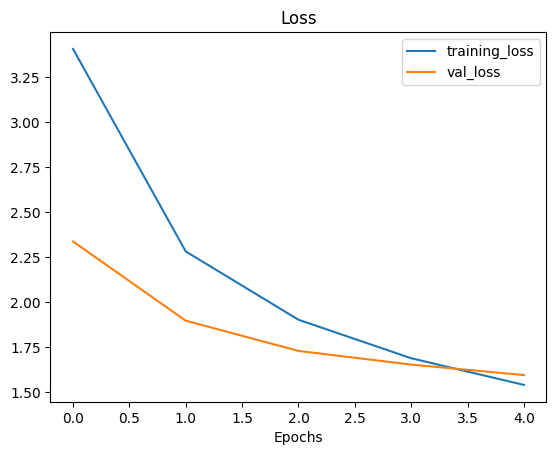

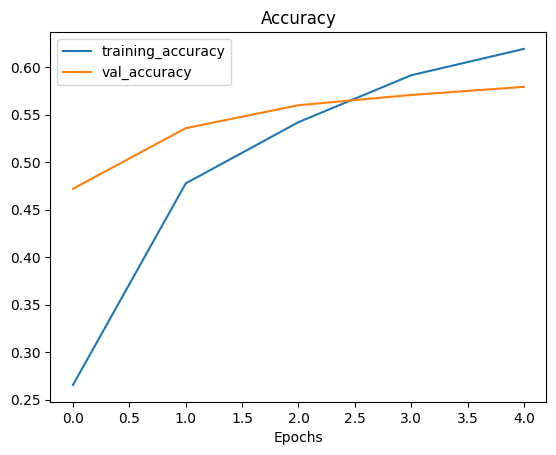

In [16]:
plot_loss_curves(effnet_b0_history)

### Fine-tuning model

In [17]:
for i, layer in enumerate(effnet_b0_model.layers):
    print(i, layer.name, layer.trainable)

0 input_layer True
1 augmentation_layers True
2 efficientnetb0 False
3 global_average_pooling_2d_layer True
4 output_layer True


#### Unfreeze the top 5 layers

In [21]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
    layer.trainable = False

In [22]:
effnet_b0_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning typically want to lower the learning rate by 10X
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

finetune_epochs = inital_epochs + 5

effnet_b0_finetune_history = effnet_b0_model.fit(
    train_batches,
    epochs=finetune_epochs,
    validation_data=val_batches,
    initial_epoch=effnet_b0_history.epoch[-1] # start training from previous last epoch
)

Epoch 5/10
237/237 [==============================] - 352s 1s/step - loss: 1.4684 - accuracy: 0.6446 - val_loss: 1.5269 - val_accuracy: 0.5929
Epoch 6/10
237/237 [==============================] - 313s 1s/step - loss: 1.3121 - accuracy: 0.6813 - val_loss: 1.4872 - val_accuracy: 0.6018
Epoch 7/10
237/237 [==============================] - 316s 1s/step - loss: 1.2256 - accuracy: 0.7019 - val_loss: 1.4604 - val_accuracy: 0.6075
Epoch 8/10
237/237 [==============================] - 307s 1s/step - loss: 1.1655 - accuracy: 0.7076 - val_loss: 1.4365 - val_accuracy: 0.6136
Epoch 9/10
237/237 [==============================] - 298s 1s/step - loss: 1.1094 - accuracy: 0.7263 - val_loss: 1.4246 - val_accuracy: 0.6158
Epoch 10/10
237/237 [==============================] - 299s 1s/step - loss: 1.0541 - accuracy: 0.7352 - val_loss: 1.4173 - val_accuracy: 0.6183


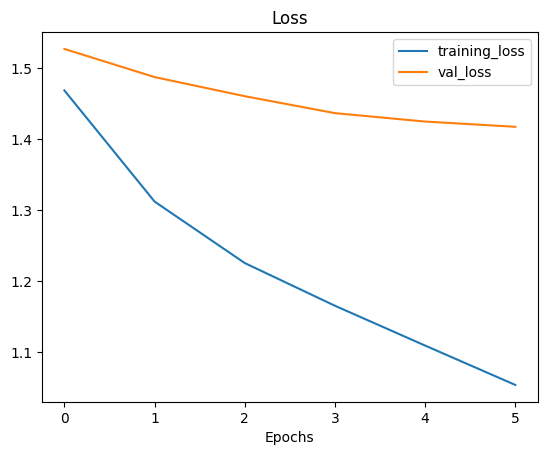

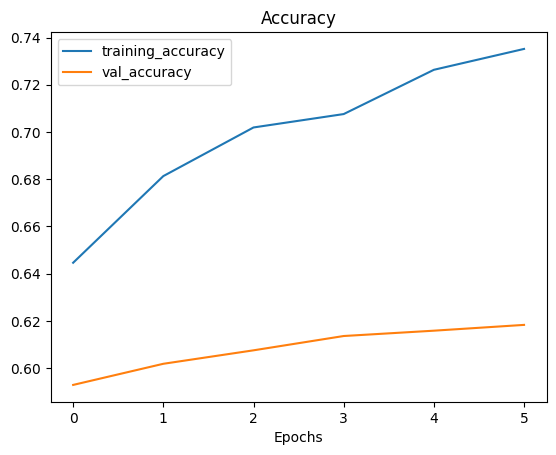

In [23]:
plot_loss_curves(effnet_b0_finetune_history)

### Before & After fine-tuning

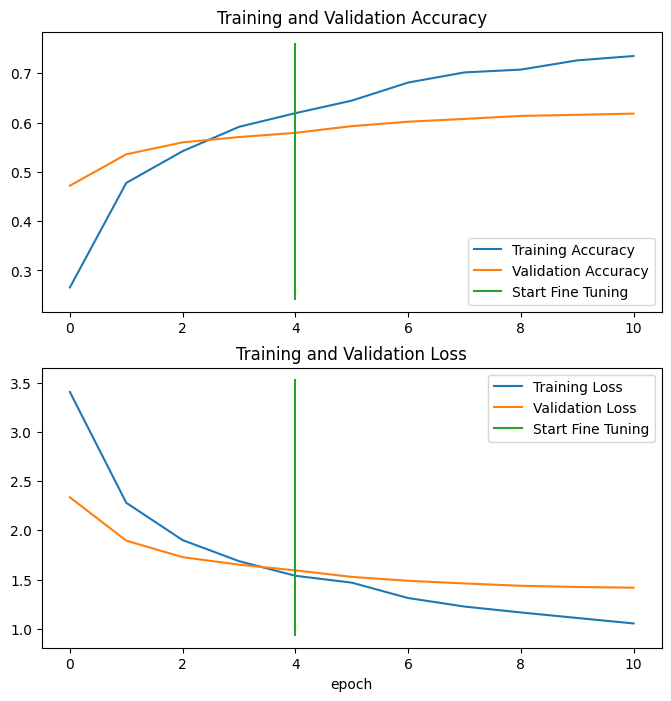

In [24]:
compare_historys(effnet_b0_history, effnet_b0_finetune_history, inital_epochs)